# WeatherPy
----

#### Observations
* observations for each plot have been listed in the cell following the visualization
* We see strong correlations between latitudes nearest to the equator (0) and higher max temperatures. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

city_name = []
temps = []
humidity = []
clouds = []
wind = []
lat = []
lng = []
country = []
date = []

print(f"Begin Request Retrieval")
print("--------------------------")

for index, city in enumerate(cities):
    print(f"Making request number: {index + 1} for City: {city}")
    
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    weather = requests.get(query_url).json()
    
    try:
        lat.append(weather['coord']['lat'])
        lng.append(weather['coord']['lon'])
        temps.append(weather['main']['temp_max'])
        humidity.append(weather['main']['humidity'])
        clouds.append(weather['clouds']['all'])
        wind.append(weather['wind']['speed'])
        country.append(weather['sys']['country'])
        date.append(weather['dt'])
        city_name.append(weather['name'])
        
    except:
        print(f"Entry not found. {query_url} Skipping...")
        
print("--------------------------")
print(f"Request Complete")
print("--------------------------")

Begin Request Retrieval
--------------------------
Making request number: 1 for City: guelavia
Entry not found. http://api.openweathermap.org/data/2.5/weather?appid=5747153a6390b3fd0deaf73d92ee87b7&q=guelavia&units=imperial Skipping...
Making request number: 2 for City: jamestown
Making request number: 3 for City: san vicente de canete
Making request number: 4 for City: altay
Making request number: 5 for City: barranco
Making request number: 6 for City: ushuaia
Making request number: 7 for City: atuona
Making request number: 8 for City: hermanus
Making request number: 9 for City: ballina
Making request number: 10 for City: kytlym
Entry not found. http://api.openweathermap.org/data/2.5/weather?appid=5747153a6390b3fd0deaf73d92ee87b7&q=kytlym&units=imperial Skipping...
Making request number: 11 for City: iroquois falls
Making request number: 12 for City: nouadhibou
Making request number: 13 for City: weston
Making request number: 14 for City: brezno
Making request number: 15 for City: bri

Making request number: 140 for City: whitefish
Making request number: 141 for City: tshela
Making request number: 142 for City: georgetown
Making request number: 143 for City: brandenburg
Making request number: 144 for City: walvis bay
Making request number: 145 for City: mys shmidta
Entry not found. http://api.openweathermap.org/data/2.5/weather?appid=5747153a6390b3fd0deaf73d92ee87b7&q=mys shmidta&units=imperial Skipping...
Making request number: 146 for City: bredasdorp
Making request number: 147 for City: moerai
Making request number: 148 for City: kaitangata
Making request number: 149 for City: saleaula
Entry not found. http://api.openweathermap.org/data/2.5/weather?appid=5747153a6390b3fd0deaf73d92ee87b7&q=saleaula&units=imperial Skipping...
Making request number: 150 for City: padang
Making request number: 151 for City: madera
Making request number: 152 for City: guerrero negro
Making request number: 153 for City: tilichiki
Making request number: 154 for City: hofn
Making request 

Making request number: 282 for City: half moon bay
Making request number: 283 for City: taiyuan
Making request number: 284 for City: aklavik
Making request number: 285 for City: iqaluit
Making request number: 286 for City: mahebourg
Making request number: 287 for City: les cayes
Making request number: 288 for City: maghama
Entry not found. http://api.openweathermap.org/data/2.5/weather?appid=5747153a6390b3fd0deaf73d92ee87b7&q=maghama&units=imperial Skipping...
Making request number: 289 for City: gazojak
Making request number: 290 for City: saint george
Making request number: 291 for City: tautira
Making request number: 292 for City: qufu
Making request number: 293 for City: bathsheba
Making request number: 294 for City: shieli
Making request number: 295 for City: cap malheureux
Making request number: 296 for City: marcona
Entry not found. http://api.openweathermap.org/data/2.5/weather?appid=5747153a6390b3fd0deaf73d92ee87b7&q=marcona&units=imperial Skipping...
Making request number: 29

Making request number: 423 for City: rawson
Making request number: 424 for City: port-gentil
Making request number: 425 for City: san pedro
Making request number: 426 for City: misawa
Making request number: 427 for City: fortuna
Making request number: 428 for City: povenets
Making request number: 429 for City: pacific grove
Making request number: 430 for City: ravar
Making request number: 431 for City: vestmanna
Making request number: 432 for City: tual
Making request number: 433 for City: erenhot
Making request number: 434 for City: thinadhoo
Making request number: 435 for City: skalistyy
Entry not found. http://api.openweathermap.org/data/2.5/weather?appid=5747153a6390b3fd0deaf73d92ee87b7&q=skalistyy&units=imperial Skipping...
Making request number: 436 for City: manacapuru
Making request number: 437 for City: dakar
Making request number: 438 for City: lagoa
Making request number: 439 for City: perleberg
Making request number: 440 for City: sola
Making request number: 441 for City: h

Making request number: 580 for City: tucuman
Making request number: 581 for City: atambua
Making request number: 582 for City: sinnamary
Making request number: 583 for City: sinop
Making request number: 584 for City: vao
Making request number: 585 for City: sooke
Making request number: 586 for City: ketou
Making request number: 587 for City: wadi maliz
Making request number: 588 for City: labuhan
Making request number: 589 for City: nurota
Making request number: 590 for City: paamiut
Making request number: 591 for City: port hedland
Making request number: 592 for City: rincon
Making request number: 593 for City: shawinigan
Making request number: 594 for City: uglegorsk
Making request number: 595 for City: grasse
Making request number: 596 for City: vysokovsk
Making request number: 597 for City: banda aceh
Making request number: 598 for City: flagstaff
Making request number: 599 for City: nha trang
--------------------------
Request Complete
--------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "city": city_name,
    "lat": lat,
    "lng": lng,
    "max temp": temps,
    "humidity": humidity,
    "wind speed": wind,
    "cloudiness": clouds,
    "country": country,
    "date": date
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lng,max temp,humidity,wind speed,cloudiness,country,date
0,Jamestown,42.0970,-79.2353,76.59,43,9.22,0,US,1666723694
1,San Vicente de Cañete,-13.0751,-76.3835,67.21,70,9.44,13,PE,1666724154
2,Altay,47.8667,88.1167,36.21,30,4.63,100,CN,1666723984
3,Barranco,9.5167,-82.7000,87.91,62,6.06,88,PA,1666724155
4,Ushuaia,-54.8000,-68.3000,47.82,49,6.91,0,AR,1666724155


In [5]:
weather_data.describe()

,lat,lng,max temp,humidity,wind speed,cloudiness,date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,20.418299,18.304292,60.552793,72.063063,8.043027,58.888288,1.666724e+09
std,33.780946,91.747608,21.761989,20.331494,5.542634,41.310156,2.270737e+02
min,-54.800000,-179.166700,-4.320000,9.000000,0.000000,0.000000,1.666723e+09
25%,-8.167650,-63.990850,47.580000,63.000000,4.000000,12.000000,1.666724e+09
50%,25.128300,21.615000,66.000000,77.000000,6.910000,75.000000,1.666724e+09
75%,48.589000,101.953750,77.125000,87.000000,11.010000,100.000000,1.666724e+09
max,78.218600,178.416700,100.400000,100.000000,33.710000,100.000000,1.666724e+09


In [7]:
weather_data.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
outliers = weather_data[weather_data['humidity'] > 100]

outliers

,city,lat,lng,max temp,humidity,wind speed,cloudiness,country,date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

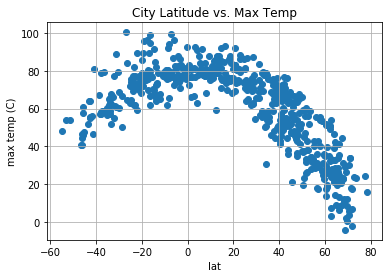

In [9]:
x_values = weather_data['lat']
y_values = weather_data['max temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temp')
plt.xlabel('lat')
plt.ylabel('max temp (C)')
plt.grid(True)

plt.savefig("Images/latvstemps.png")
plt.show()

In [22]:
## this plot is visualizing max temp and latitude, showing that the highest temps are closest to the equator

## Latitude vs. Humidity Plot

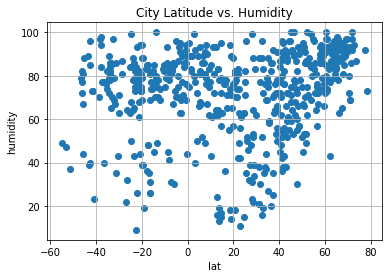

In [10]:
x_values = weather_data['lat']
y_values = weather_data['humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity')
plt.xlabel('lat')
plt.ylabel('humidity')
plt.grid(True)

plt.savefig("Images/latvshumidity.png")
plt.show()

In [23]:
## thie plot visualizes humidity and latitude, showing that humidity % is spread evenly across latitudes

## Latitude vs. Cloudiness Plot

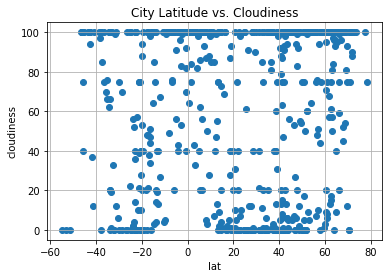

In [11]:
x_values = weather_data['lat']
y_values = weather_data['cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('lat')
plt.ylabel('cloudiness')
plt.grid(True)

plt.savefig("Images/latvscloudiness.png")
plt.show()

In [ ]:
## this plot visualizes latitude and cloudiness. We see that cloudiness has more results at 0 and 100 %. 

## Latitude vs. Wind Speed Plot

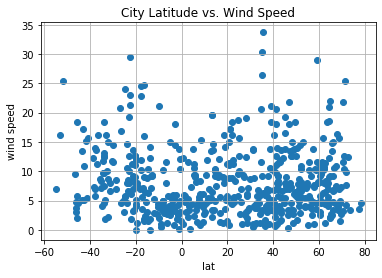

In [12]:
x_values = weather_data['lat']
y_values = weather_data['wind speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('lat')
plt.ylabel('wind speed')
plt.grid(True)

plt.savefig("Images/latvswind.png")
plt.show()

In [24]:
## this plot visualizes latitude and wind speed. it seems that wind speed can be higher further from the equator

## Linear Regression

In [13]:
north = weather_data.loc[weather_data['lat'] >= 0]
south = weather_data.loc[weather_data['lat'] < 0]

n_lats = north['lat']
s_lats = south['lat']

n_temp = north['max temp']
s_temp = south['max temp']

n_humidity = north['humidity']
s_humidity = south['humidity']

n_wind = north['wind speed']
s_wind = south['wind speed']

n_cloud = north['cloudiness']
s_cloud = south['cloudiness']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.866361333694883


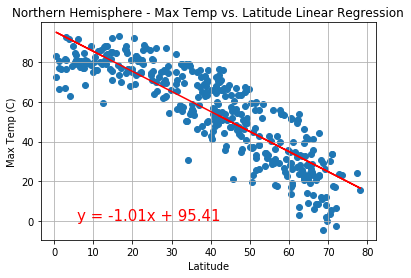

In [14]:
x_values = n_lats
y_values = n_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.grid(True)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r value is: {rvalue}")

plt.savefig('images/northlat_vs_temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.6865349461851944


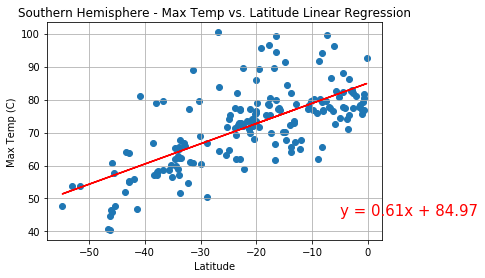

In [15]:
x_values = s_lats
y_values = s_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-5,45),fontsize=15,color="red")
plt.grid(True)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r value is: {rvalue}")

plt.savefig('images/southlat_vs_temp.png')
plt.show()

In [25]:
## these plots show the correlation between latitude and max temps. for the northern hemisphere, we see that there is a negative correlation, showing that the higher the latitude gets (further from the equator), that max temps drop. For the southern hemisphere, we see the opposite in which the higher the latitude gets, (closer to the equator), that the temperatures will rise. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.33191243343487575


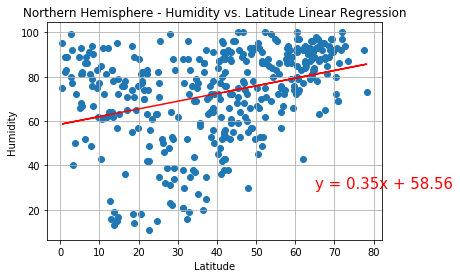

In [16]:
x_values = n_lats
y_values = n_humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(65,30),fontsize=15,color="red")
plt.grid(True)

plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r value is: {rvalue}")

plt.savefig('images/northlat_vs_humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.10034989893255654


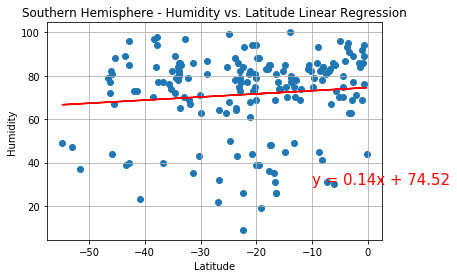

In [17]:
x_values = s_lats
y_values = s_humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,30),fontsize=15,color="red")
plt.grid(True)

plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r value is: {rvalue}")

plt.savefig('images/southlat_vs_humidity.png')
plt.show()

In [26]:
## comparing the northern and sourther hemisphere latitude vs humidity, we have weak correlations as both r values are < .5. Meaning, there is not a strong correlation between latitude and humidity. In the northern hemisphere, we see a slightly stronger correlation(.332) in which as the latitude gets higher, so does humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.1714547166569558


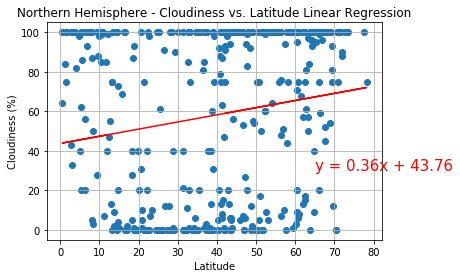

In [18]:
x_values = n_lats
y_values = n_cloud

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(65,30),fontsize=15,color="red")
plt.grid(True)

plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r value is: {rvalue}")

plt.savefig('images/northlat_vs_clouds.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.1420885899148083


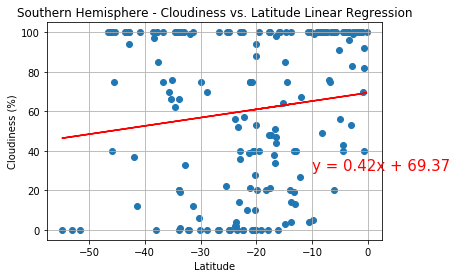

In [19]:
x_values = s_lats
y_values = s_cloud

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,30),fontsize=15,color="red")
plt.grid(True)

plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r value is: {rvalue}")

plt.savefig('images/southlat_vs_clouds.png')
plt.show()

In [ ]:
## these two plots visualize cloudiness vs latitude in both hemispheres. We see weak positive correlations for cloudiness as it relates to latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.07060313854413533


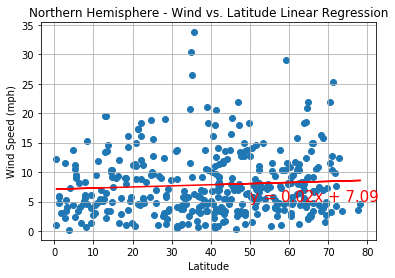

In [20]:
x_values = n_lats
y_values = n_wind

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,5),fontsize=15,color="red")
plt.grid(True)

plt.title("Northern Hemisphere - Wind vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r value is: {rvalue}")

plt.savefig('images/northlat_vs_winds.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.2715774011608263


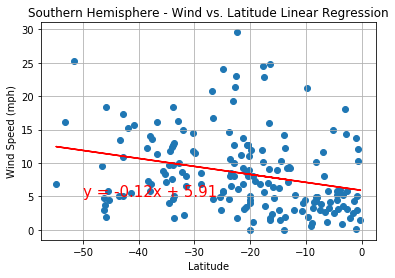

In [21]:
x_values = s_lats
y_values = s_wind

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")
plt.grid(True)

plt.title("Southern Hemisphere - Wind vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r value is: {rvalue}")

plt.savefig('images/southlat_vs_winds.png')
plt.show()

In [27]:
## Lastly, we compare wind speeds and latitude. The northern hemisphere does not have much of a correlation as it seems wind speeds are spread evenly across latitudes. The southern hemisphere has a weak negative correlation (-0.272) in which as you get closer to the equator, wind speeds in the sample cities are slightly lower. 